In [15]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_cwts(instances, images_per_row=10, **options):
    size = 100
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [16]:
eyes_closed = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_eyes_closed_alpha_test.csv", thousands=',')
eyes_open = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_eyes_open_alpha_test.csv", thousands=',')

In [17]:
eyes_closed.head()

,Channel,10-20,ChannelGroup,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
0,1,P4,0,0.000056,0.000055,0.000045,0.000025,-2.375464e-07,-0.000024,-0.000038,...,0.000009,0.000015,0.000017,0.000011,6.599544e-07,-0.000010,-0.000016,-0.000013,-0.000004,7.999592e-06
1,2,POz,0,0.000056,0.000054,0.000044,0.000025,9.503535e-08,-0.000023,-0.000037,...,-0.000003,0.000010,0.000019,0.000020,1.339209e-05,0.000003,-0.000006,-0.000011,-0.000010,-2.914526e-06
2,3,PO4,0,0.000054,0.000052,0.000041,0.000022,-1.808362e-06,-0.000024,-0.000038,...,0.000008,0.000017,0.000020,0.000015,4.557141e-06,-0.000007,-0.000013,-0.000013,-0.000007,2.849157e-06
3,4,O2,0,0.000051,0.000048,0.000036,0.000018,-4.459333e-06,-0.000024,-0.000036,...,-0.000007,0.000005,0.000015,0.000019,1.675149e-05,0.000009,0.000002,-0.000003,-0.000004,-1.573360e-07
4,5,O1,0,0.000051,0.000050,0.000040,0.000022,-3.917398e-07,-0.000021,-0.000034,...,0.000001,0.000014,0.000025,0.000030,2.671259e-05,0.000017,0.000005,-0.000006,-0.000011,-9.322180e-06


Saving figure some_cwt_plot


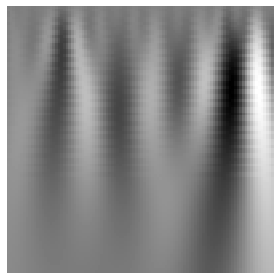

In [18]:
from scipy import signal

widths = np.linspace(1.0, 15.0, 100);
npsig = eyes_open.iloc[0]

npsig = npsig.drop(labels=['Channel', '10-20', 'ChannelGroup'])

npsigIter = np.fromiter(npsig, float)
mock_alpha_cwt = signal.cwt(npsigIter, signal.ricker, widths);

mock_alpha_cwt_flattened = mock_alpha_cwt.flatten()
mock_alpha_cwt_dataframe = pd.DataFrame(mock_alpha_cwt_flattened)
#mock_alpha_one_cwt = signal.cwt(mock_alpha[0], signal.ricker, widths);

some_cwt = mock_alpha_cwt_dataframe
some_cwt_image = some_cwt.values.reshape(100, 100)
plt.imshow(some_cwt_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_cwt_plot")
plt.show()

In [19]:
eyes_closed_numeric = eyes_closed.drop(labels=['Channel', '10-20', 'ChannelGroup'], axis=1)
eyes_open_numeric = eyes_open.drop(labels=['Channel', '10-20', 'ChannelGroup'], axis=1)

eyes_open_non_numeric = eyes_open.drop(eyes_open.columns[3:], axis=1)
eyes_closed_non_numeric = eyes_closed.drop(eyes_closed.columns[3:], axis=1)

eyes_open_non_numeric

,Channel,10-20,ChannelGroup
0,1,P4,0
1,2,POz,0
2,3,PO4,0
3,4,O2,0
4,5,O1,0
...,...,...,...
2299,4,O2,287
2300,5,O1,287
2301,6,Oz,287
2302,7,PO3,287


In [20]:
eyes_open_cwt = []
eyes_closed_cwt = []

widths = np.linspace(1.0, 15.0, 100);
    
for index, value in enumerate(eyes_open_numeric.iloc):
    npsig = np.fromiter(eyes_open_numeric.iloc[index], float)
    row_cwt = signal.cwt(npsig, signal.ricker, widths)
    row_cwt_flattened = row_cwt.flatten()
    eyes_open_cwt.append(row_cwt_flattened)
    
for index, value in enumerate(eyes_closed_numeric.iloc):
    npsig = np.fromiter(eyes_closed_numeric.iloc[index], float)
    row_cwt = signal.cwt(npsig, signal.ricker, widths)
    row_cwt_flattened = row_cwt.flatten()
    eyes_closed_cwt.append(row_cwt_flattened)

In [21]:
eyes_open_cwt

[array([ 6.95542221e-08, -5.45821810e-06, -2.74128789e-06, ...,
        -4.89752042e-05, -4.98916503e-05, -4.99932832e-05]),
 array([-1.56937639e-06, -6.88341813e-06, -2.19862308e-06, ...,
        -4.59053214e-05, -4.70547514e-05, -4.74558305e-05]),
 array([ 7.38026369e-07, -5.78420149e-06, -3.49733280e-06, ...,
        -4.95995476e-05, -5.06423446e-05, -5.08591833e-05]),
 array([ 8.25646933e-07, -5.10818202e-06, -3.23973603e-06, ...,
        -4.98168803e-05, -5.11621374e-05, -5.16699934e-05]),
 array([ 1.63187418e-06, -1.58723637e-06, -1.43361194e-06, ...,
        -5.37181781e-05, -5.48508409e-05, -5.51036113e-05]),
 array([-1.38583953e-06, -5.39206877e-06, -1.91019846e-06, ...,
        -5.10742379e-05, -5.22916444e-05, -5.26691167e-05]),
 array([-2.33059647e-07, -4.47893676e-06, -2.73414262e-06, ...,
        -5.03376250e-05, -5.14349423e-05, -5.17221496e-05]),
 array([-2.25419340e-07, -3.99571327e-06, -1.91721507e-06, ...,
        -5.13741318e-05, -5.21531431e-05, -5.21100860e-05]),


In [25]:
eyes_open_with_cwt = pd.concat([eyes_open_non_numeric, pd.DataFrame(eyes_open_cwt)], axis=1)
eyes_closed_with_cwt = pd.concat([eyes_closed_non_numeric, pd.DataFrame(eyes_closed_cwt)], axis=1)

In [23]:
eyes_open_with_cwt

,Channel,10-20,ChannelGroup,0,1,2,3,4,5,6,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,P4,0,6.955422e-08,-0.000005,-0.000003,1.474605e-08,3.886286e-07,-7.091470e-07,-1.544617e-06,...,-2.326105e-05,-2.854858e-05,-3.344563e-05,-0.000038,-0.000042,-0.000045,-0.000047,-0.000049,-0.000050,-0.000050
1,2,POz,0,-1.569376e-06,-0.000007,-0.000002,1.536719e-06,1.842417e-06,4.148696e-08,-1.510213e-06,...,-2.057221e-05,-2.557211e-05,-3.025977e-05,-0.000035,-0.000038,-0.000041,-0.000044,-0.000046,-0.000047,-0.000047
2,3,PO4,0,7.380264e-07,-0.000006,-0.000003,-1.118688e-06,-9.108058e-07,-1.661828e-06,-1.624835e-06,...,-2.307316e-05,-2.840320e-05,-3.337451e-05,-0.000038,-0.000042,-0.000045,-0.000048,-0.000050,-0.000051,-0.000051
3,4,O2,0,8.256469e-07,-0.000005,-0.000003,-1.285963e-06,-1.080656e-06,-1.544127e-06,-1.319266e-06,...,-2.143075e-05,-2.696845e-05,-3.218049e-05,-0.000037,-0.000041,-0.000045,-0.000048,-0.000050,-0.000051,-0.000052
4,5,O1,0,1.631874e-06,-0.000002,-0.000001,-2.240299e-07,-3.518361e-07,-1.742506e-06,-2.703328e-06,...,-2.522317e-05,-3.096047e-05,-3.630945e-05,-0.000041,-0.000045,-0.000049,-0.000052,-0.000054,-0.000055,-0.000055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,4,O2,287,-5.369497e-06,-0.000009,0.000001,5.119131e-06,2.763543e-06,-8.397976e-07,-3.414373e-06,...,-1.893954e-06,-9.744600e-07,6.076230e-08,0.000001,0.000002,0.000003,0.000004,0.000005,0.000006,0.000007
2300,5,O1,287,-9.410336e-06,-0.000015,0.000003,9.836934e-06,7.082946e-06,1.624069e-06,-3.653597e-06,...,3.856833e-06,5.408356e-06,7.006715e-06,0.000009,0.000010,0.000012,0.000013,0.000014,0.000015,0.000016
2301,6,Oz,287,-9.357887e-06,-0.000010,0.000005,1.130265e-05,8.413453e-06,2.482808e-06,-3.398589e-06,...,1.089617e-07,1.960326e-06,3.904928e-06,0.000006,0.000008,0.000010,0.000012,0.000013,0.000015,0.000016
2302,7,PO3,287,-8.536908e-06,-0.000015,0.000002,9.944193e-06,7.409078e-06,1.104243e-06,-4.886081e-06,...,1.068950e-07,1.778862e-06,3.512002e-06,0.000005,0.000007,0.000009,0.000010,0.000012,0.000013,0.000014


In [24]:
eyes_open_grouped = eyes_open_with_cwt.groupby(['ChannelGroup'])
eyes_closed_grouped = eyes_closed_with_cwt.groupby(['ChannelGroup'])

In [26]:
processed_eyes_open = []
processed_eyes_closed = []

for channel_group in eyes_open_grouped:
    channel_group_df = pd.DataFrame(channel_group[1])
    channel_group_df = channel_group_df.drop(labels=['Channel', '10-20', 'ChannelGroup'], axis=1)
    processed_eyes_open.append(channel_group_df)
    
for channel_group in eyes_closed_grouped:
    channel_group_df = pd.DataFrame(channel_group[1])
    channel_group_df = channel_group_df.drop(labels=['Channel', '10-20', 'ChannelGroup'], axis=1)
    processed_eyes_closed.append(channel_group_df)
        

processed_eyes_closed

[       0         1         2         3             4         5         6     \
 0  0.000004  0.000043  0.000029  0.000015  2.917447e-06 -0.000011 -0.000021   
 1  0.000004  0.000043  0.000029  0.000014  2.818782e-06 -0.000010 -0.000020   
 2  0.000004  0.000042  0.000028  0.000013  2.392136e-06 -0.000010 -0.000020   
 3  0.000005  0.000041  0.000025  0.000011  6.372355e-07 -0.000011 -0.000019   
 4  0.000004  0.000040  0.000026  0.000013  2.407745e-06 -0.000009 -0.000018   
 5  0.000004  0.000042  0.000027  0.000012  2.007260e-06 -0.000010 -0.000019   
 6  0.000004  0.000046  0.000030  0.000013  1.592421e-06 -0.000010 -0.000018   
 7  0.000004  0.000045  0.000030  0.000014  6.586036e-07 -0.000013 -0.000022   
 
        7         8         9     ...      9990      9991          9992  \
 0 -0.000023 -0.000018 -0.000006  ...  0.000004  0.000002  2.699298e-07   
 1 -0.000022 -0.000017 -0.000005  ...  0.000007  0.000005  2.789604e-06   
 2 -0.000023 -0.000018 -0.000006  ...  0.000005  0.00

In [27]:
eyes_open_labels = []
eyes_closed_labels = []

for cwt_row in processed_eyes_open:
    eyes_open_labels.append(False)
for cwt_row in processed_eyes_closed:
    eyes_closed_labels.append(True)
    
eyes_open_labels = pd.DataFrame(eyes_open_labels)
eyes_closed_labels = pd.DataFrame(eyes_closed_labels)
eyes_open_labels

,0
0,False
1,False
2,False
3,False
4,False
...,...
283,False
284,False
285,False
286,False


In [39]:
real_data = processed_eyes_open + processed_eyes_closed
real_data_labels = eyes_open_labels.append(eyes_closed_labels)

real_data = np.reshape(real_data,(712,8*10000))
real_data[0]

#from sklearn.preprocessing import minmax_scale
#real_data = minmax_scale(real_data) #doesn't affect anything...

array([ 6.95542221e-08, -5.45821810e-06, -2.74128789e-06, ...,
       -5.13741318e-05, -5.21531431e-05, -5.21100860e-05])

In [52]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(real_data, test_size=0.2, random_state=42)
train_set_labels, test_set_labels = train_test_split(real_data_labels, test_size=0.2, random_state=42)

train_set_labels_eyes_closed = (train_set_labels.values.ravel() == True)
test_set_labels_eyes_closed = (test_set_labels.values.ravel() == True)

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(train_set, train_set_labels_eyes_closed)

RandomForestClassifier(random_state=42)

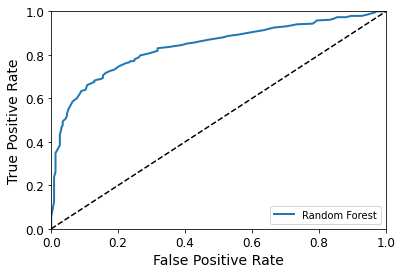

In [50]:
from sklearn.model_selection import cross_val_predict

y_probas_forest = cross_val_predict(forest_clf, train_set, train_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

from sklearn.metrics import roc_curve
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels_eyes_closed,y_scores_forest)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_set_labels_eyes_closed, y_scores_forest)

0.8369673513182098

In [ ]:
y_probas_forest_test = cross_val_predict(forest_clf, test_set, test_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

y_scores_forest_test = y_probas_forest_test[:, 1]   # score = proba of positive class
fpr_forest_test, tpr_forest_test, thresholds_forest_test = roc_curve(test_set_labels_eyes_closed,y_scores_forest_test)

plot_roc_curve(fpr_forest_test, tpr_forest_test, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.figure(figsize=(9,9))
example_images = np.r_[test_set[:100]]
plot_cwts(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [ ]:
import joblib

joblib.dump(forest_clf, "eyes_closed_detector.pkl")